In [68]:
import pandas as pd

import os

from azureml.core import Workspace, Dataset, Run
from azureml.core.authentication import ServicePrincipalAuthentication
from datetime import datetime, date, timedelta
run = Run.get_context()

#run
#print(run)

client_secret ="A~G0GcXvJl8W.OonncFMXR_5g0e1h5-lo~" #run.get_secret(name="aadappsecretAML")

print (client_secret)
if client_secret == None:
    print('No access so quitting')
    exit()

svc_pr = ServicePrincipalAuthentication(
    tenant_id="72f988bf-86f1-41af-91ab-2d7cd011db47",
    service_principal_id="8e1d74de-d84f-4971-b737-66e737b636c1",
    service_principal_password=client_secret)

subscription_id = 'bd04922c-a444-43dc-892f-74d5090f8a9a'
resource_group = 'mlplayarearg'
workspace_name = 'testdeployment'

workspace = Workspace(subscription_id, resource_group, workspace_name, auth=svc_pr)

print ('test')
dataset = Dataset.get_by_name(workspace, name='rolledup')
myDataFrame = dataset.to_pandas_dataframe()


A~G0GcXvJl8W.OonncFMXR_5g0e1h5-lo~
test


In [69]:
myDataFrame.head()

,meterId,resourceGroup,date,cost,quantity
0,12da282f-7e96-49e2-983a-9a65da2a4866,functionapp,2020-02-23T00:00:00.0000000Z,0.0,0.001200
1,32c3ebec-1646-49e3-8127-2cafbd3a04d8,functionapp,2020-02-23T00:00:00.0000000Z,0.0,0.000153
2,9995d93a-7d35-4d3f-9c69-7a7fea447ef4,functionapp,2020-02-23T00:00:00.0000000Z,0.0,0.000032
3,ad22fac8-9da5-4577-8683-56ae94d39e42,functionapp,2020-02-23T00:00:00.0000000Z,0.0,0.001200
4,bb20dfda-6d18-4bb1-b7fc-86a05d9cfb8d,functionapp,2020-02-23T00:00:00.0000000Z,0.0,0.006000


In [2]:

myDataFrame['newDate'] = myDataFrame['date'].apply(lambda x: datetime.strptime(x[0:10],'%Y-%m-%d'))
ForecastDataFrame = myDataFrame[myDataFrame['newDate'] > datetime.today() + timedelta(days=-70)]
print(ForecastDataFrame.shape)
print(myDataFrame.shape)

(1560, 6)
(7322, 6)


In [3]:
dataByRG = ForecastDataFrame.groupby(['resourceGroup','newDate'], as_index=False).agg({'cost':sum,'quantity':sum})
dataByRG

,resourceGroup,newDate,cost,quantity
0,INDIASTARTUP,2021-02-01,0.040346,0.207021
1,INDIASTARTUP,2021-02-02,0.000012,0.000020
2,INDIASTARTUP,2021-02-03,0.000012,0.000020
3,INDIASTARTUP,2021-02-05,0.000012,0.000020
4,INDIASTARTUP,2021-02-06,0.000012,0.000020
5,INDIASTARTUP,2021-02-07,0.000012,0.000020
6,INDIASTARTUP,2021-02-08,0.000012,0.000020
7,INDIASTARTUP,2021-02-10,0.000012,0.000020
8,INDIASTARTUP,2021-02-11,0.000012,0.000020
9,INDIASTARTUP,2021-02-12,0.000012,0.000020


In [4]:
dataByMeter = ForecastDataFrame.groupby(['meterId','newDate'], as_index=False).agg({'cost':sum,'quantity':sum})
dataByMeter[dataByMeter['meterId'] == '0883795a-0ef6-40a1-bbe6-a201246ee4e5']

,meterId,newDate,cost,quantity
72,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-01,0.183946,1.000000
73,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-02,0.183946,1.000000
74,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-03,0.183946,1.000000
75,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-04,0.183946,1.000000
76,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-05,0.183946,1.000000
77,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-06,0.183946,1.000000
78,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-07,0.183946,1.000000
79,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-08,0.183946,1.000000
80,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-09,0.183946,1.000000
81,0883795a-0ef6-40a1-bbe6-a201246ee4e5,2021-02-10,0.183946,1.000000


In [5]:
pivotedDataRG = dataByRG.pivot_table('cost',index=['newDate'],columns='resourceGroup', aggfunc='sum', fill_value=0)
pivotedDataMeter = dataByMeter.pivot_table('quantity',index=['newDate'],columns='meterId', aggfunc='sum', fill_value=0)

In [6]:

pivotedDataRG = pivotedDataRG.reset_index()
pivotedDataMeter = pivotedDataMeter.reset_index()
print(pivotedDataRG.shape)
print(pivotedDataMeter.shape)

(69, 7)
(69, 45)


In [7]:
pivotedDataRG

resourceGroup,newDate,INDIASTARTUP,appsvc_windows_centralus,awesomemanishapp,indiastartup,mobileapprg,vmall
0,2021-02-01,0.040346,0,0.000012,2.963627,0.000000,0.184143
1,2021-02-02,0.000012,0,0.000012,2.971864,0.000000,0.184110
2,2021-02-03,0.000012,0,0.000012,3.000659,0.000000,0.184211
3,2021-02-04,0.000000,0,0.000012,2.970382,0.000000,0.184571
4,2021-02-05,0.000012,0,0.000012,2.967580,0.000000,0.184094
5,2021-02-06,0.000012,0,0.000012,2.984011,0.000000,0.184165
6,2021-02-07,0.000012,0,0.000012,2.978585,0.000000,0.184211
7,2021-02-08,0.000012,0,0.000012,2.946352,0.000000,0.184088
8,2021-02-09,0.000000,0,0.000012,2.958474,0.000000,0.184049
9,2021-02-10,0.000012,0,0.000012,2.965955,0.000000,0.184306


In [8]:
pivotedDataRG.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
resourceGroup,,,,,,,,
INDIASTARTUP,69.0,4.385829e-03,0.031809,0.000000,0.000009,0.000009,0.000012,0.261728
appsvc_windows_centralus,69.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
awesomemanishapp,69.0,1.015385e-05,0.000002,0.000005,0.000009,0.000010,0.000012,0.000012
indiastartup,69.0,2.319341e+00,1.120168,0.000071,2.713021,2.947757,2.962390,3.000659
mobileapprg,69.0,3.821652e-07,0.000002,0.000000,0.000000,0.000000,0.000000,0.000009
vmall,69.0,1.806891e-01,0.022714,0.000000,0.184100,0.184199,0.184371,0.184571


In [9]:
pivotedDataRG
#ForecastColumns = pivotedDataRG.drop('newDate')
#ForecastColumns

resourceGroup,newDate,INDIASTARTUP,appsvc_windows_centralus,awesomemanishapp,indiastartup,mobileapprg,vmall
0,2021-02-01,0.040346,0,0.000012,2.963627,0.000000,0.184143
1,2021-02-02,0.000012,0,0.000012,2.971864,0.000000,0.184110
2,2021-02-03,0.000012,0,0.000012,3.000659,0.000000,0.184211
3,2021-02-04,0.000000,0,0.000012,2.970382,0.000000,0.184571
4,2021-02-05,0.000012,0,0.000012,2.967580,0.000000,0.184094
5,2021-02-06,0.000012,0,0.000012,2.984011,0.000000,0.184165
6,2021-02-07,0.000012,0,0.000012,2.978585,0.000000,0.184211
7,2021-02-08,0.000012,0,0.000012,2.946352,0.000000,0.184088
8,2021-02-09,0.000000,0,0.000012,2.958474,0.000000,0.184049
9,2021-02-10,0.000012,0,0.000012,2.965955,0.000000,0.184306


In [10]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


In [11]:
#remove unneccessary columns with 0 values
pivotedDataRG = pivotedDataRG[['INDIASTARTUP','awesomemanishapp','indiastartup','vmall']]
pivotedDataRG.columns

Index(['INDIASTARTUP', 'awesomemanishapp', 'indiastartup', 'vmall'], dtype='object', name='resourceGroup')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pan

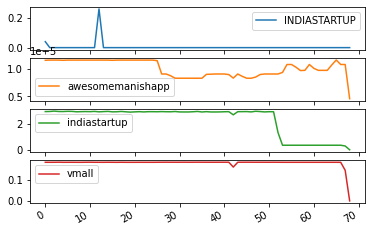

In [12]:
plot_cols = ['INDIASTARTUP','awesomemanishapp','indiastartup','vmall']
plot_features = pivotedDataRG[plot_cols]
#plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [13]:
#Removing last 2 day of data as its not complete
pivotedDataRG = pivotedDataRG[0:pivotedDataRG.shape[0]-2]

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pan

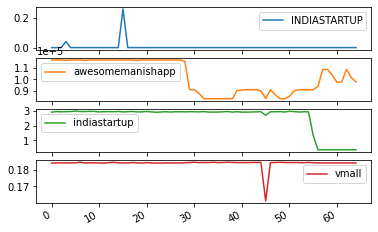

In [21]:
plot_cols = ['INDIASTARTUP','awesomemanishapp','indiastartup','vmall']
plot_features = pivotedDataRG[plot_cols]
#plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [14]:
pivotedDataRG.columns

Index(['INDIASTARTUP', 'awesomemanishapp', 'indiastartup', 'vmall'], dtype='object', name='resourceGroup')

In [15]:
column_indices = {name: i for i, name in enumerate(pivotedDataRG.columns)}
column_indices

{'INDIASTARTUP': 0, 'awesomemanishapp': 1, 'indiastartup': 2, 'vmall': 3}

In [16]:
train_df = pivotedDataRG[0:45]
val_df = pivotedDataRG[46:50]
test_df = pivotedDataRG[51:]

In [17]:

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [18]:
train_df

resourceGroup,INDIASTARTUP,awesomemanishapp,indiastartup,vmall
0,0.854727,0.815969,0.343706,0.110712
1,-0.170534,0.840132,0.551522,0.101094
2,-0.170534,0.840132,1.278018,0.130452
3,-0.170839,0.840132,0.514134,0.235535
4,-0.170534,0.815969,0.443419,0.096351
5,-0.170534,0.840132,0.857987,0.117018
6,-0.170534,0.840132,0.721084,0.130505
7,-0.170534,0.840132,-0.092154,0.094603
8,-0.170839,0.840132,0.213677,0.083315
9,-0.170534,0.840132,0.402419,0.158193


In [19]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [20]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [21]:
def plot(self, model=None, plot_col='awesomemanishapp', max_subplots=3):
  inputs, labels = self.example
  print(inputs.shape)
  print(labels.shape)
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  #max_n = len(inputs)  
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Date')

WindowGenerator.plot = plot

In [22]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [23]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [24]:
w2 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['awesomemanishapp'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['awesomemanishapp']

(32, 7, 4)
(32, 1, 1)


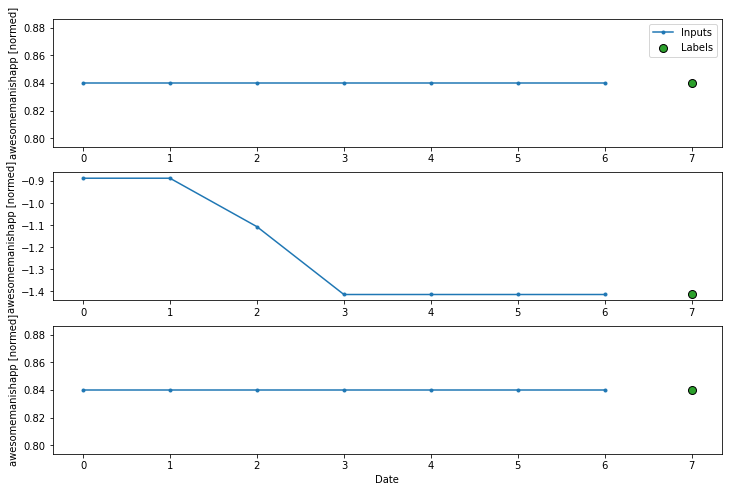

In [25]:
w2.plot()

In [26]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['awesomemanishapp'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['awesomemanishapp']

In [27]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 4)
Labels shape (batch, time, features): (32, 1, 1)


In [28]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [29]:
baseline = Baseline(label_index=column_indices['awesomemanishapp'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 1s 736ms/step - loss: 0.0417 - mean_absolute_error: 0.1754


In [30]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['awesomemanishapp'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['awesomemanishapp']

In [31]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (21, 24, 4)
Output shape: (21, 24, 1)


(21, 24, 4)
(21, 24, 1)


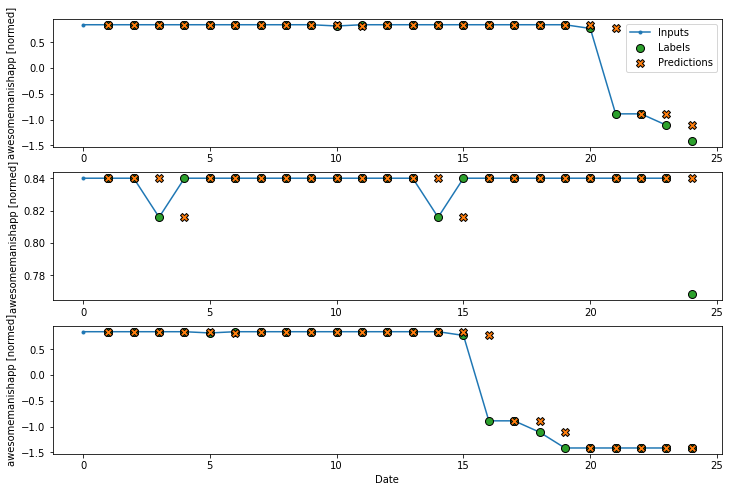

In [32]:
wide_window.plot(baseline)

In [33]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [34]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 4)
Output shape: (32, 1, 1)


In [35]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [36]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 2s 470ms/step - loss: 4.3846 - mean_absolute_error: 1.4032 - val_loss: 3.1368 - val_mean_absolute_error: 1.7230
Epoch 2/20
2/2 [==============================] - 0s 87ms/step - loss: 3.4257 - mean_absolute_error: 1.3113 - val_loss: 3.1289 - val_mean_absolute_error: 1.7208
Epoch 3/20
2/2 [==============================] - 0s 100ms/step - loss: 4.3333 - mean_absolute_error: 1.3901 - val_loss: 3.1230 - val_mean_absolute_error: 1.7192
Epoch 4/20
2/2 [==============================] - 0s 99ms/step - loss: 4.1785 - mean_absolute_error: 1.3763 - val_loss: 3.1158 - val_mean_absolute_error: 1.7173
Epoch 5/20
2/2 [==============================] - 0s 90ms/step - loss: 4.1261 - mean_absolute_error: 1.3723 - val_loss: 3.1079 - val_mean_absolute_error: 1.7151
Epoch 6/20
2/2 [==============================] - 0s 244ms/step - loss: 3.3563 - mean_absolute_error: 1.2946 - val_loss: 3.0992 - val_mean_absolute_error: 1.7127
Epoch 7/20
2/2 [===============

(21, 24, 4)
(21, 24, 1)


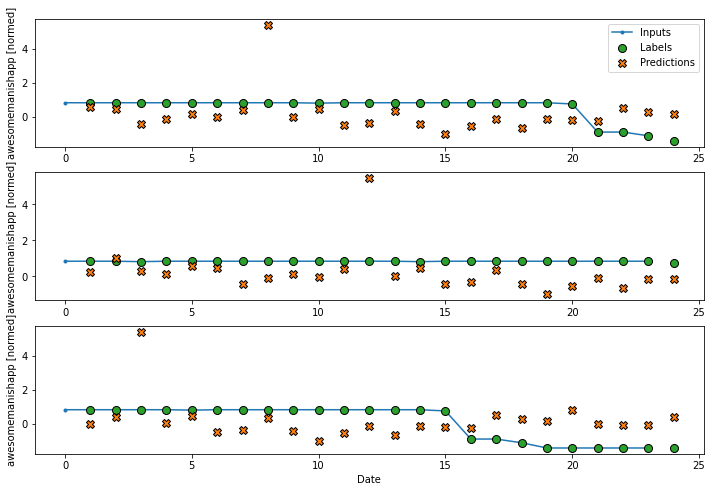

In [37]:
wide_window.plot(linear)

In [38]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 1s 280ms/step - loss: 0.8992 - mean_absolute_error: 0.8962 - val_loss: 1.0359 - val_mean_absolute_error: 1.0124
Epoch 2/20
2/2 [==============================] - 0s 100ms/step - loss: 0.7650 - mean_absolute_error: 0.8254 - val_loss: 0.8661 - val_mean_absolute_error: 0.9255
Epoch 3/20
2/2 [==============================] - 0s 102ms/step - loss: 0.6458 - mean_absolute_error: 0.7542 - val_loss: 0.7287 - val_mean_absolute_error: 0.8483
Epoch 4/20
2/2 [==============================] - 0s 95ms/step - loss: 0.5598 - mean_absolute_error: 0.7002 - val_loss: 0.5968 - val_mean_absolute_error: 0.7668
Epoch 5/20
2/2 [==============================] - 0s 87ms/step - loss: 0.4841 - mean_absolute_error: 0.6454 - val_loss: 0.4739 - val_mean_absolute_error: 0.6824
Epoch 6/20
2/2 [==============================] - 0s 252ms/step - loss: 0.4199 - mean_absolute_error: 0.5974 - val_loss: 0.3673 - val_mean_absolute_error: 0.6000
Epoch 7/20
2/2 [==============

In [39]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['awesomemanishapp'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['awesomemanishapp']

(32, 3, 4)
(32, 1, 1)


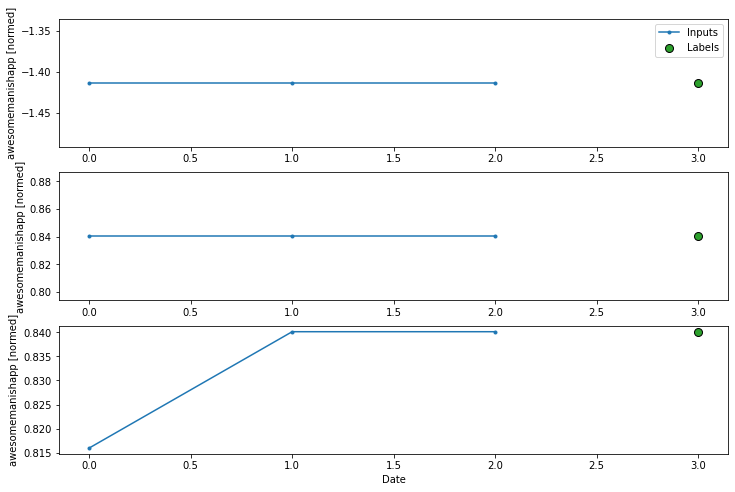

In [40]:
conv_window.plot()

In [41]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [42]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 4)
Output shape: (32, 1, 1)


In [43]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 62ms/step - loss: 0.0467 - mean_absolute_error: 0.2161


(32, 3, 4)
(32, 1, 1)


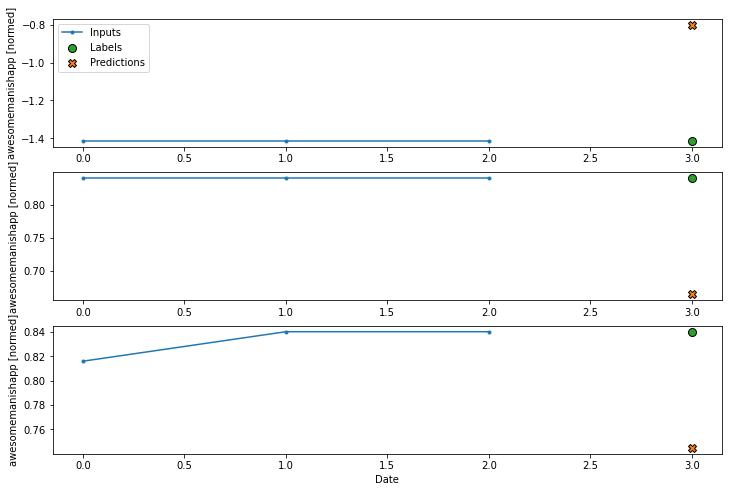

In [44]:
conv_window.plot(multi_step_dense)

In [48]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [49]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 4)
Output shape: (32, 1, 1)


In [62]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 56ms/step - loss: 0.0072 - mean_absolute_error: 0.0846


In [51]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (21, 24, 4)
Labels shape: (21, 24, 1)
Output shape: (21, 22, 1)


In [63]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['awesomemanishapp'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['awesomemanishapp']

In [54]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (19, 26, 4)
Labels shape: (19, 24, 1)
Output shape: (19, 24, 1)


In [67]:
history = compile_and_fit(conv_model, wide_conv_window)

#IPython.display.clear_output()
#val_performance['Conv'] = conv_model.evaluate(wide_conv_window.val)
#performance['Conv'] = conv_model.evaluate(wide_conv_window.test, verbose=0)

Epoch 1/20
1/1 [==============================] - 1s 604ms/step - loss: 0.1195 - mean_absolute_error: 0.1854


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 2/20
1/1 [==============================] - 0s 105ms/step - loss: 0.1188 - mean_absolute_error: 0.1842


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 3/20
1/1 [==============================] - 0s 103ms/step - loss: 0.1176 - mean_absolute_error: 0.1826


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 4/20
1/1 [==============================] - 0s 105ms/step - loss: 0.1166 - mean_absolute_error: 0.1831


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 5/20
1/1 [==============================] - 0s 104ms/step - loss: 0.1159 - mean_absolute_error: 0.1813


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 6/20
1/1 [==============================] - 0s 277ms/step - loss: 0.1152 - mean_absolute_error: 0.1787


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 7/20
1/1 [==============================] - 0s 116ms/step - loss: 0.1145 - mean_absolute_error: 0.1757


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 8/20
1/1 [==============================] - 0s 103ms/step - loss: 0.1138 - mean_absolute_error: 0.1733


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 9/20
1/1 [==============================] - 0s 105ms/step - loss: 0.1131 - mean_absolute_error: 0.1723


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 10/20
1/1 [==============================] - 0s 106ms/step - loss: 0.1125 - mean_absolute_error: 0.1722


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 11/20
1/1 [==============================] - 0s 106ms/step - loss: 0.1119 - mean_absolute_error: 0.1727


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 12/20
1/1 [==============================] - 0s 100ms/step - loss: 0.1114 - mean_absolute_error: 0.1724


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 13/20
1/1 [==============================] - 0s 99ms/step - loss: 0.1108 - mean_absolute_error: 0.1711


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 14/20
1/1 [==============================] - 0s 96ms/step - loss: 0.1103 - mean_absolute_error: 0.1695


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 15/20
1/1 [==============================] - 0s 101ms/step - loss: 0.1097 - mean_absolute_error: 0.1680


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 16/20
1/1 [==============================] - 0s 96ms/step - loss: 0.1092 - mean_absolute_error: 0.1671


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 17/20
1/1 [==============================] - 0s 99ms/step - loss: 0.1087 - mean_absolute_error: 0.1667


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 18/20
1/1 [==============================] - 0s 104ms/step - loss: 0.1083 - mean_absolute_error: 0.1660


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 19/20
1/1 [==============================] - 0s 102ms/step - loss: 0.1079 - mean_absolute_error: 0.1654


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


Epoch 20/20
1/1 [==============================] - 0s 91ms/step - loss: 0.1075 - mean_absolute_error: 0.1644


WARNING - Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error


(19, 26, 4)
(19, 24, 1)


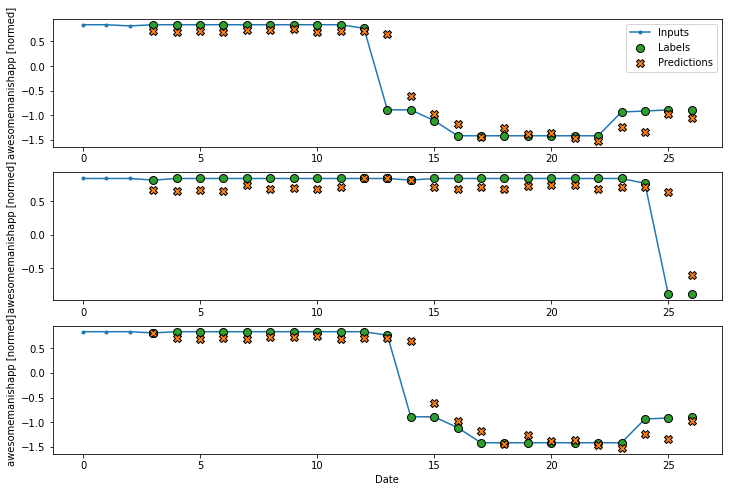

In [66]:
wide_conv_window.plot(conv_model)

In [59]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [60]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (21, 24, 4)
Output shape: (21, 24, 1)


In [61]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

OverflowError: cannot convert float infinity to integer